# Primary Goals:

1. Predict heart disease.
2. One of the questions posted on the kaggle page is, "Can you indicate which variables have a significant effect on the likelihood of heart disease?" So, if your work allows you to comment on this question then please do!
# Assignment Specs:

- https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease 
- You need to use at least one boosting model in your work to answer the questions above, but you should explore at least two other models in order to answer the above questions as best you can. You may use multiple boosting models if you like, but I'd encourage you to consider past model types we've discussed.
- The kaggle page indicates that the classes are extremely unbalanced in this dataset. You should keep this in mind as you work and if appropriate, take steps to adjust for it. You may need to look up how to adjust for this yourself, but I could probably make some suggestions...as a starting place check out under- and oversampling ideas described here: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/Links to an external site. .
- Your submission should be built and written with non-experts as the target audience. All of your code should still be included, but do your best to narrate your work in accessible ways.

# Import Data

In [19]:
import pandas as pd

df = pd.read_csv("/Users/dan/calpoly/BusinessAnalytics/GSB545ADML/Week3/heart_disease_data/2020/heart_2020_cleaned.csv")
df.value_counts("HeartDisease")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [22]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Deal with categorical variables
heart = df.copy()
# List of columns you want to encode
cols_to_encode = [
    'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'Sex',
    'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
    'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'
]
for col in cols_to_encode:
    heart[col] = LabelEncoder().fit_transform(heart[col])


X = heart.drop('HeartDisease', axis=1)
y = heart['HeartDisease']    
# Deal with class imbalance          
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Set up for modeling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# AdaBoost

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

params = [
    {"n_estimators": 1, "learning_rate": 0.5},
    {"n_estimators": 1, "learning_rate": 1.0},
    {"n_estimators": 1, "learning_rate": 1.5},
    {"n_estimators": 10, "learning_rate": 0.5},
    {"n_estimators": 10, "learning_rate": 1.0},
    {"n_estimators": 10, "learning_rate": 1.5},
    {"n_estimators": 25, "learning_rate": 0.5},
    {"n_estimators": 25, "learning_rate": 1.0},
    {"n_estimators": 25, "learning_rate": 1.5},
    {"n_estimators": 100, "learning_rate": 0.5},
    {"n_estimators": 100, "learning_rate": 1.0},
    {"n_estimators": 100, "learning_rate": 1.5},
     {"n_estimators": 200, "learning_rate": 0.5},
    {"n_estimators": 200, "learning_rate": 1.0},
    {"n_estimators": 200, "learning_rate": 1.5}
]
base_estimator = DecisionTreeClassifier(max_depth=2)

results = []
for p in params:
    model = AdaBoostClassifier(estimator=base_estimator, **p, algorithm='SAMME')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results.append((p["n_estimators"], p["learning_rate"], acc))

# Show results
results_df = pd.DataFrame(results, columns=["n_estimators", "learning_rate", "accuracy"])
results_df.sort_values(by='accuracy', ascending=False)

,n_estimators,learning_rate,accuracy
12,200,0.5,0.764566
9,100,0.5,0.764292
13,200,1.0,0.763562
10,100,1.0,0.763562
14,200,1.5,0.762009
11,100,1.5,0.761735
6,25,0.5,0.760731
8,25,1.5,0.759269
7,25,1.0,0.757626
5,10,1.5,0.753425


# Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Gradient Boosting model
params = [
    {"n_estimators": 1, "learning_rate": 0.5},
    {"n_estimators": 1, "learning_rate": 1.0},
    {"n_estimators": 1, "learning_rate": 1.5},
    {"n_estimators": 10, "learning_rate": 0.5},
    {"n_estimators": 10, "learning_rate": 1.0},
    {"n_estimators": 10, "learning_rate": 1.5},
    {"n_estimators": 25, "learning_rate": 0.5},
    {"n_estimators": 25, "learning_rate": 1.0},
    {"n_estimators": 25, "learning_rate": 1.5},
    {"n_estimators": 100, "learning_rate": 0.5},
    {"n_estimators": 100, "learning_rate": 1.0},
    {"n_estimators": 100, "learning_rate": 1.5},
    {"n_estimators": 200, "learning_rate": 0.5},
    {"n_estimators": 200, "learning_rate": 1.0},
    {"n_estimators": 200, "learning_rate": 1.5}
]

gb_results = []
for p in params:
    model = GradientBoostingClassifier(**p)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    gb_results.append((p["n_estimators"], p["learning_rate"], acc))

# Show results
gb_results_df = pd.DataFrame(gb_results, columns=["n_estimators", "learning_rate", "accuracy"])
print("Gradient Boosting Results:")
gb_results_df.sort_values(by='accuracy', ascending=False)


Gradient Boosting Results:


,n_estimators,learning_rate,accuracy
6,25,0.5,0.766484
7,25,1.0,0.765479
3,10,0.5,0.763562
4,10,1.0,0.763379
9,100,0.5,0.762557
5,10,1.5,0.760000
8,25,1.5,0.759635
12,200,0.5,0.759452
10,100,1.0,0.755890
13,200,1.0,0.753699


# XGBoost

In [29]:
y_resampled_xg = LabelEncoder().fit_transform(y_resampled)
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X_resampled, y_resampled_xg, test_size=0.2, random_state=42)

In [36]:
from xgboost import XGBClassifier


# XGBoost model
params = [
    {"n_estimators": 1, "learning_rate": 0.5},
    {"n_estimators": 1, "learning_rate": 1.0},
    {"n_estimators": 1, "learning_rate": 1.5},
    {"n_estimators": 10, "learning_rate": 0.5},
    {"n_estimators": 10, "learning_rate": 1.0},
    {"n_estimators": 10, "learning_rate": 1.5},
    {"n_estimators": 25, "learning_rate": 0.5},
    {"n_estimators": 25, "learning_rate": 1.0},
    {"n_estimators": 25, "learning_rate": 1.5},
    {"n_estimators": 100, "learning_rate": 0.5},
    {"n_estimators": 100, "learning_rate": 1.0},
    {"n_estimators": 100, "learning_rate": 1.5},
    {"n_estimators": 200, "learning_rate": 0.5},
    {"n_estimators": 200, "learning_rate": 1.0},
    {"n_estimators": 200, "learning_rate": 1.5}
]

xgb_results = []
for p in params:
    model = XGBClassifier(eval_metric='mlogloss', **p)
    model.fit(X_train_xg, y_train_xg)
    pred = model.predict(X_test_xg)
    acc = accuracy_score(y_test_xg, pred)
    xgb_results.append((p["n_estimators"], p["learning_rate"], acc))

# Show results
xgb_results_df = pd.DataFrame(xgb_results, columns=["n_estimators", "learning_rate", "accuracy"])
print("XGBoost Results:")
xgb_results_df.sort_values(by='accuracy', ascending=False)

XGBoost Results:


,n_estimators,learning_rate,accuracy
3,10,0.5,0.768493
6,25,0.5,0.761187
4,10,1.0,0.757626
0,1,0.5,0.753607
1,1,1.0,0.753607
2,1,1.5,0.753516
9,100,0.5,0.751872
7,25,1.0,0.750137
12,200,0.5,0.746575
5,10,1.5,0.743014


Thus the best model created for this data set is XGBoosting with 10 estimators and a learning rate of 0.5. This gives us an accuracy of 0.768.

# Final Model

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Train one XGBoost model
model = XGBClassifier(n_estimators=10, learning_rate=0.5, eval_metric='mlogloss')
model.fit(X_train_xg, y_train_xg)

# Predict
pred = model.predict(X_test_xg)

# Evaluate
acc = accuracy_score(y_test_xg, pred)
print(f"Accuracy: {acc:.4f}")

print(classification_report(y_test_xg, pred))



Accuracy: 0.7685
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      5434
           1       0.75      0.81      0.78      5516

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [40]:
importances = model.feature_importances_
feature_names = X_train_xg.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


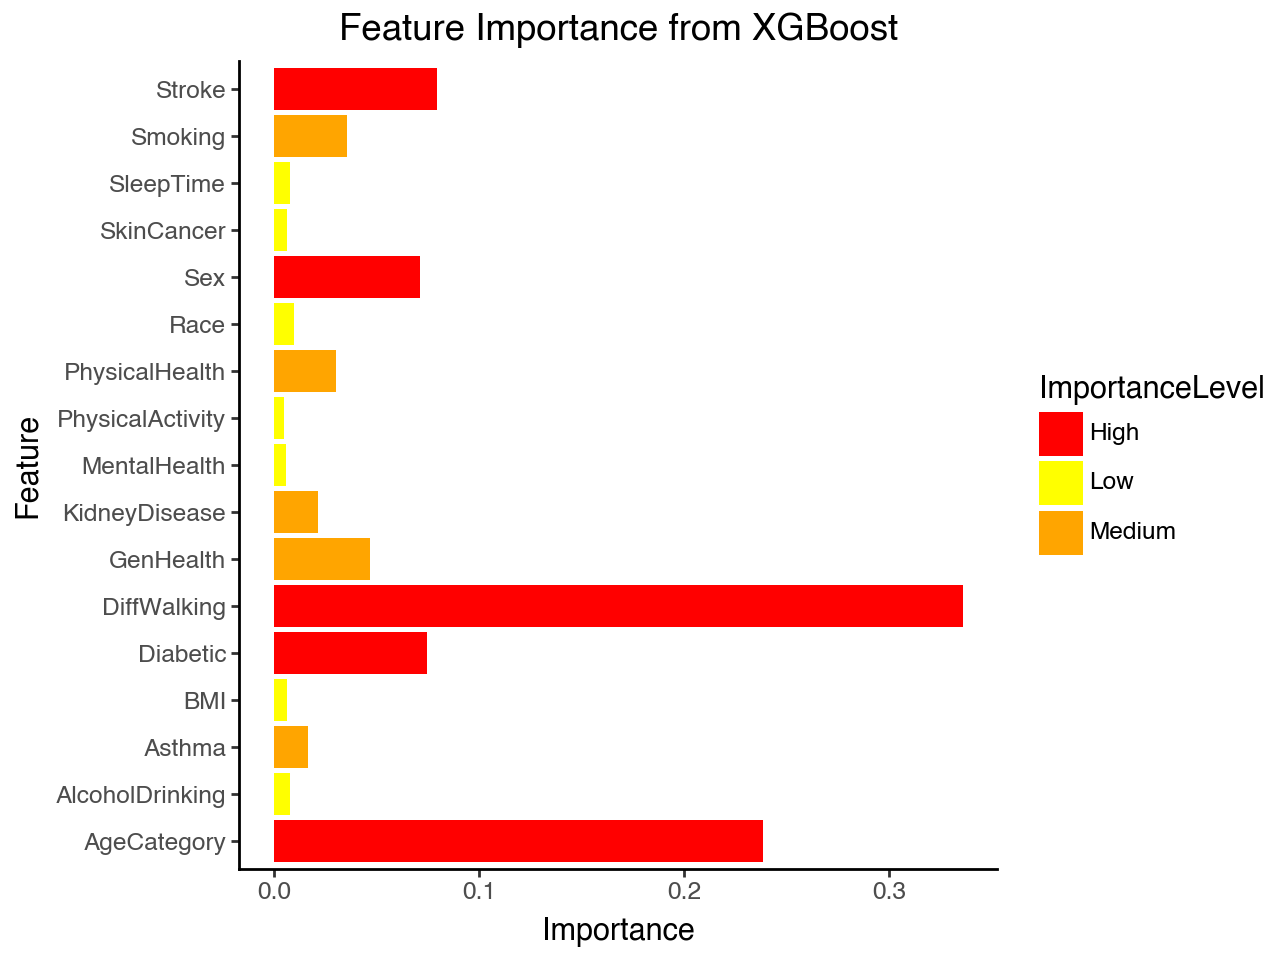

In [46]:
# Imports
import pandas as pd
from plotnine import ggplot, aes, geom_col, coord_flip, labs, theme_classic, scale_fill_manual

# Get feature importance
importances = model.feature_importances_
feature_names = X_train_xg.columns

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Define importance levels
def categorize_importance(val):
    if val > 0.05:
        return 'High'
    elif val > 0.01:
        return 'Medium'
    else:
        return 'Low'

importance_df['ImportanceLevel'] = importance_df['Importance'].apply(categorize_importance)

# Plot with color based on importance
(
    ggplot(importance_df, aes(x='Feature', y='Importance', fill='ImportanceLevel')) +
    geom_col() +
    coord_flip() +
    labs(title='Feature Importance from XGBoost',
         x='Feature',
         y='Importance') +
    scale_fill_manual(values={
        'High': 'red',
        'Medium': 'orange',
        'Low': 'yellow'
    }) +
    theme_classic()
)


From our visualization we found that the most important features are DiffWalking, AgeCategory, Stroke, Diabetic, and Sex.